 # 🧹 Limpieza de Datos

In [12]:
# 1. Importamos librerías necesarias
import pandas as pd
import seaborn as sns

In [13]:
# 2. Cargamos el dataset
data = pd.read_csv(r"C:\Users\Borja\Desktop\Online_Sales_Analysis\data\online_sales.csv")

# 3. Mostramos las primeras filas para una vista general
data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [14]:
# 4. Comprobamos si hay valores nulos en el dataset
null_values = data.isnull().sum()
null_values

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [15]:
# 5. Comprobamos si hay filas duplicadas
duplicate_rows = data.duplicated().sum()
duplicate_rows

np.int64(0)

In [16]:
# 6. Descripción general de la columna de fechas
date_info = data['Date'].describe()
date_info

count            240
unique           240
top       2024-01-01
freq               1
Name: Date, dtype: object

In [17]:
# 7. Convertimos la columna 'Date' al tipo datetime para facilitar el análisis temporal
data['Date'] = pd.to_datetime(data['Date'])

data.dtypes

Transaction ID               int64
Date                datetime64[ns]
Product Category            object
Product Name                object
Units Sold                   int64
Unit Price                 float64
Total Revenue              float64
Region                      object
Payment Method              object
dtype: object

<Axes: xlabel='Unit Price'>

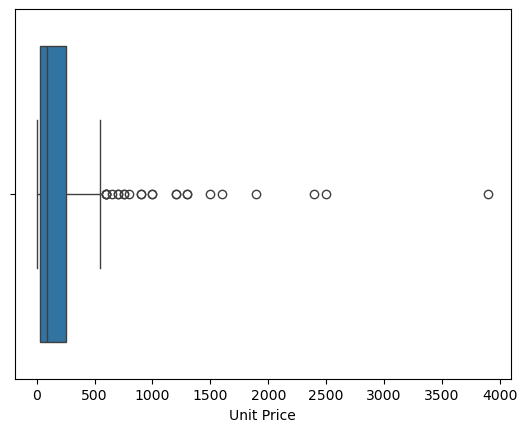

In [18]:
# 8. Vemos si hay valores atípicos en el precio por unidad, como por ejemplo valores negativos o muy altos.
sns.boxplot(x=data['Unit Price'])

Como podemos observar, existe un valor que destaca por encima del resto y que aparece solo una vez. En este caso, no lo consideraremos un outlier; sin embargo, en caso de hacerlo, se puede comprobar que su eliminación no afecta significativamente las métricas generales, ya que los resultados presentados a continuación se mantienen prácticamente iguales.

In [19]:
# Filtramos la fila correspondiende a ese outlier en caso considerarlo así
row_outlier = data[data['Unit Price'] > 3500]

# Mostramos el nuevo dataset quitando esa fila
df = data.drop(row_outlier.index)
df

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


In [20]:
# 9. Comprobamos si Total Revenue = Unit Price * Units Sold
(data['Total Revenue'] == (data['Unit Price'] * data['Units Sold']).round(2)).unique()

array([ True])

In [21]:
# 10. Separamos la fecha en año, mes, día, nombre del día de la semana y número de semana.
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month_name()
data['Day'] = data['Date'].dt.day
data['Day_of_Week'] = data['Date'].dt.day_name()
data['Week_Number'] = data['Date'].dt.isocalendar().week

data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Year,Month,Day,Day_of_Week,Week_Number
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,2024,January,1,Monday,1
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,2024,January,2,Tuesday,1
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,2024,January,3,Wednesday,1
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,2024,January,4,Thursday,1
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,2024,January,5,Friday,1


In [22]:
# Guardamos el dataset limpiado en un nuevo archivo CSV
data.to_csv(r"C:\Users\Borja\Desktop\Online_Sales_Analysis\data\online_sales_cleaned.csv",sep=';', decimal=',', index=False)